In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dividend data
Data_Path = "C:\\Users\\HP\\Downloads\\archive\\"

Data_File = "Mastercard_stock_dividends.csv"

dividends = pd.read_csv(Data_Path + Data_File)

# Convert date column to datetime format
dividends['Date'] = pd.to_datetime(dividends['Date'], utc =True)

# Sort by date in ascending order
dividends = dividends.sort_values('Date')




In [17]:
dividends.head()

,Date,Dividends
0,2006-10-05 04:00:00+00:00,0.009
1,2007-01-10 05:00:00+00:00,0.009
2,2007-04-04 04:00:00+00:00,0.015
3,2007-06-29 04:00:00+00:00,0.015
4,2007-10-17 04:00:00+00:00,0.015


In [18]:
dividends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       74 non-null     datetime64[ns, UTC]
 1   Dividends  74 non-null     float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 1.3 KB


In [19]:
dividends.isnull().sum()

Date         0
Dividends    0
dtype: int64

In [20]:
dividends.duplicated().sum()

0

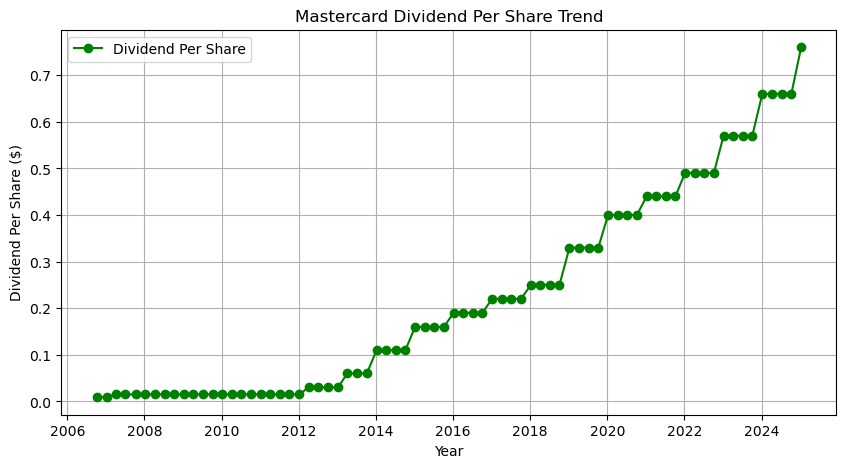

In [21]:
# Plot: Dividend Per Share Trend
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], dividends['Dividends'], marker='o', linestyle='-', color='green', label='Dividend Per Share')
plt.xlabel('Year')
plt.ylabel('Dividend Per Share ($)')
plt.title('Mastercard Dividend Per Share Trend')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Loading stock price data

Data_File = "C:\\Users\\HP\\Downloads\\archive\\Mastercard_stock_history.csv"

stock_prices = pd.read_csv(Data_File)
stock_prices['Date'] = pd.to_datetime(stock_prices['Date'], utc=True)

# Merge stock price data with dividends
data = pd.merge(dividends, stock_prices, on='Date', how='inner')

# Display merged dataset
data.head()


,Date,Dividends_x,Open,High,Low,Close,Volume,Dividends_y,Stock Splits
0,2006-10-05 04:00:00+00:00,0.009,6.376403,6.661504,6.306041,6.633177,25756000,0.009,0.0
1,2007-01-10 05:00:00+00:00,0.009,9.659639,9.740120,9.420023,9.579157,35099000,0.009,0.0
2,2007-04-04 04:00:00+00:00,0.015,9.972487,9.977983,9.730708,9.818627,19401000,0.015,0.0
3,2007-06-29 04:00:00+00:00,0.015,15.224895,15.325729,15.009480,15.204729,25935000,0.015,0.0
4,2007-10-17 04:00:00+00:00,0.015,14.497287,14.533071,13.887117,14.186238,25717000,0.015,0.0


In [ ]:
data.rename(columns={'Dividends_x': 'Dividend'}, inplace=True)  # Keep dividends_x and renaming it into Dividend
data.drop(columns=['Dividends_y'], inplace=True)  # Remove dividends_y


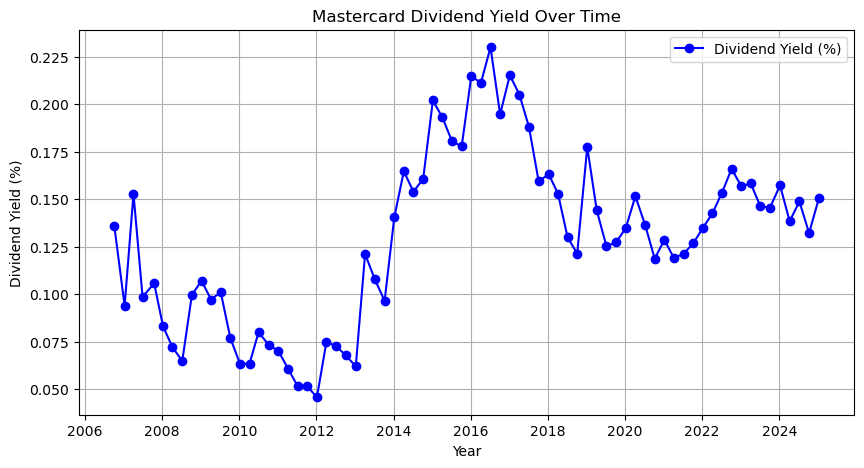

In [36]:
# Calculate Dividend Yield = (Dividend / Closing Price) * 100
data['Dividend Yield (%)'] = (data['Dividend'] / data['Close']) * 100

# Plot: Dividend Yield Over Time
plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['Dividend Yield (%)'], marker='o', linestyle='-', color='b', label='Dividend Yield (%)')
plt.xlabel('Year')
plt.ylabel('Dividend Yield (%)')
plt.title('Mastercard Dividend Yield Over Time')
plt.legend()
plt.grid(True)
plt.show()


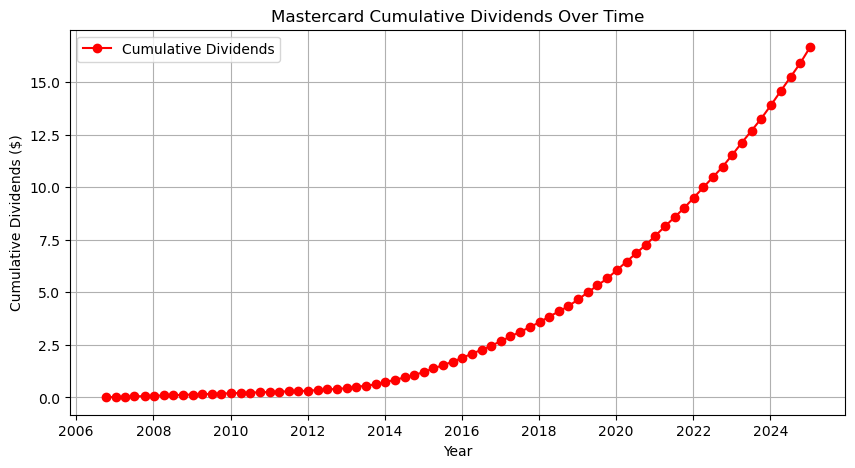

In [45]:
# Calculate Cumulative Dividends Over Time
data['Cumulative Dividends'] = data['Dividend'].cumsum()

# Plot: Cumulative Dividends Over Time
plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['Cumulative Dividends'], marker='o', linestyle='-', color='red', label='Cumulative Dividends')
plt.xlabel('Year')
plt.ylabel('Cumulative Dividends ($)')
plt.title('Mastercard Cumulative Dividends Over Time')
plt.legend()
plt.grid(True)
plt.show()


                      Key Observations from the Dividend Per Share Trend Chart

1. Steady Growth: The dividend per share has shown a consistent upward trend since around 2012, indicating Mastercard's strong financial performance and commitment to returning value to shareholders.

2. Accelerated Increases: The pace of dividend growth appears to accelerate after 2018, suggesting stronger earnings and confidence from management.

3. No Dividend Cuts: There are no visible declines in dividends, which signals financial stability and a shareholder-friendly policy.

4. Recent Sharp Increase: The most recent jump in dividends (2024-2025) is larger than previous years, indicating a potentially aggressive dividend growth strategy.


                       Key Observations from the Dividend Yield Chart
                       
1. Fluctuating Dividend Yield: The dividend yield has experienced significant fluctuations over time, indicating that changes in stock price have influenced yield levels.

2. Peak Around 2016-2017: The highest dividend yield (~0.225%) was observed around 2016-2017, possibly due to either a strong dividend increase or a temporary dip in stock price.

3. Declining Trend Post-2017: After 2017, the dividend yield generally declined, which suggests that the stock price has risen faster than dividend growth.

4. Stabilization Since 2020: From 2020 onward, the dividend yield appears to have stabilized within the 0.10%–0.15% range, suggesting a more predictable yield pattern.


                        Key Observations from the Cumulative Dividends Chart

1. Exponential Growth in Cumulative Dividends: The cumulative dividends steadily increased from 2006 and accelerated sharply after 2016, showing a compounding effect over time.

2. Slow Start (2006–2012): Dividend payments were relatively small in the early years, likely due to Mastercard focusing on growth rather than high payouts.

3. Significant Acceleration Post-2016: From 2016 onward, cumulative dividends rose rapidly, indicating consistent dividend increases by the company.


                        Key Takeaways from the Three Observations:

Dividend Per Share is Rising Steadily:
The dividend per share (DPS) has grown consistently over time, especially after 2013, indicating strong earnings growth and a shareholder-friendly policy.

Dividend Yield is Volatile:
Despite rising DPS, the dividend yield fluctuates because it depends on the stock price.
The yield peaked around 2016–2017 but declined afterward, suggesting that stock price growth outpaced dividend growth.

Cumulative Dividends Show an Exponential Growth Pattern:
Mastercard has steadily increased dividends over the years, with a sharp acceleration after 2016, confirming strong financial performance and consistent dividend reinvestment potential.

